<a href="https://colab.research.google.com/github/DN554/APPLE/blob/main/AAPL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
AAPL=yf.download("AAPL",
                 start="2019-01-01",
                 end='2025-08-05',
                 progress=False)

In [ ]:
AAPL

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2019-01-02,37.617847,37.839383,36.738858,36.896077,148158800
2019-01-03,33.870838,34.711713,33.825578,34.297229,365248800
2019-01-04,35.316761,35.385843,34.254354,34.428245,234428400
2019-01-07,35.238152,35.452541,34.754589,35.421573,219111200
2019-01-08,35.909908,36.164793,35.378705,35.626440,164101200
...,...,...,...,...,...
2025-07-28,214.050003,214.850006,213.059998,214.029999,37858000
2025-07-29,211.270004,214.809998,210.820007,214.179993,51411700


In [ ]:
AAPL.describe()


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,1655.000000,1655.000000,1655.000000,1655.000000,1.655000e+03
mean,142.019374,143.475069,140.412431,141.877869,9.091159e+07
std,56.675526,57.164388,56.133004,56.636381,5.154756e+07
min,33.870838,34.711713,33.825578,34.297229,2.323470e+07
25%,108.975517,110.504426,106.925570,109.233570,5.537185e+07
50%,146.824829,148.447085,145.348127,146.509495,7.785210e+07
75%,181.513245,183.466978,180.074632,181.402649,1.089922e+08
max,258.396667,259.474086,257.010028,257.568678,4.265100e+08


In [ ]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1655 entries, 2019-01-02 to 2025-08-01
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   1655 non-null   float64
 1   (High, AAPL)    1655 non-null   float64
 2   (Low, AAPL)     1655 non-null   float64
 3   (Open, AAPL)    1655 non-null   float64
 4   (Volume, AAPL)  1655 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 77.6 KB


In [ ]:
AAPL.isnull().sum()

,,0
Price,Ticker,
Close,AAPL,0
High,AAPL,0
Low,AAPL,0
Open,AAPL,0
Volume,AAPL,0


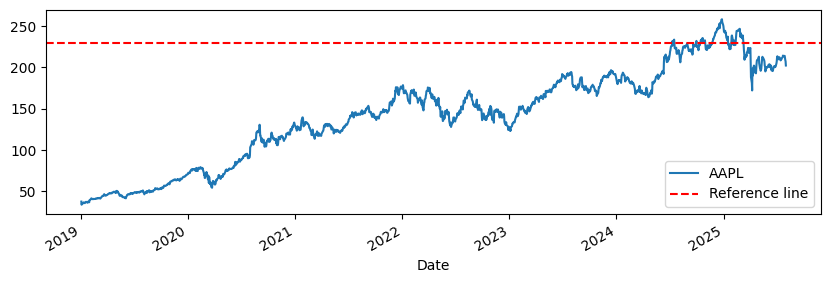

In [ ]:
AAPL["Close"].plot(figsize=(10,3)).axhline(y=230, color='r' , linestyle="--", label="Reference line")
plt.legend()
plt.show()

In [ ]:
AAPL["Close_simple_rtn"] = AAPL["Close"].pct_change()

In [ ]:
AAPL["Close_simple_rtn"]

,Close_simple_rtn
Date,
2019-01-02,NaN
2019-01-03,-0.099607
2019-01-04,0.042689
2019-01-07,-0.002226
2019-01-08,0.019063
...,...
2025-07-28,0.000795
2025-07-29,-0.012988
2025-07-30,-0.010508


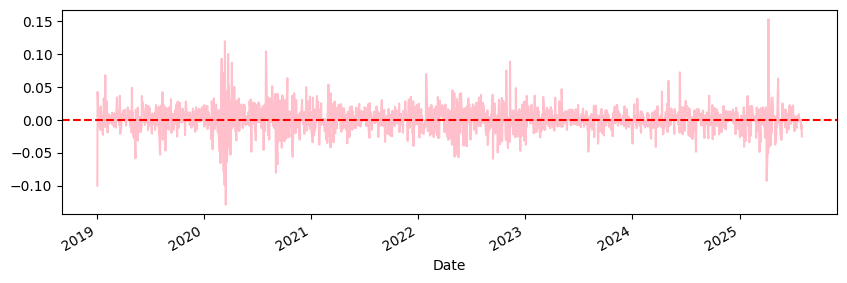

In [ ]:
AAPL["Close_simple_rtn"].plot(figsize=(10,3),color="pink").axhline(y=0.00, color='r' , linestyle="--", label="Reference line")
plt.show()

In [ ]:
AAPL['Close_simple_rtn'].std()

0.01987629944232182

In [ ]:
AAPL['Close_simple_rtn'].describe()

,Close_simple_rtn
count,1654.000000
mean,0.001215
std,0.019876
min,-0.128647
25%,-0.008089
50%,0.001368
75%,0.011715
max,0.153288


In [ ]:
corr=AAPL.corr(method='pearson')
AAPL["Close_corr"] = AAPL["Close"].pct_change()
AAPL["Volume_corr"] = AAPL["Volume"].pct_change()

In [ ]:
AAPL

Price,Close,High,Low,Open,Volume,Close_simple_rtn,Close_corr,Volume_corr
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,
Date,,,,,,,,
2019-01-02,37.617847,37.839383,36.738858,36.896077,148158800,NaN,NaN,NaN
2019-01-03,33.870838,34.711713,33.825578,34.297229,365248800,-0.099607,NaN,1.465252
2019-01-04,35.316761,35.385843,34.254354,34.428245,234428400,0.042689,NaN,-0.358168
2019-01-07,35.238152,35.452541,34.754589,35.421573,219111200,-0.002226,NaN,-0.065338
2019-01-08,35.909908,36.164793,35.378705,35.626440,164101200,0.019063,NaN,-0.251060
...,...,...,...,...,...,...,...,...
2025-07-28,214.050003,214.850006,213.059998,214.029999,37858000,0.000795,NaN,-0.059868
2025-07-29,211.270004,214.809998,210.820007,214.179993,51411700,-0.012988,NaN,0.358014


In [ ]:
#Corelation of a particular column
AAPL['Close_simple_rtn'].corr(AAPL['Close_simple_rtn'].shift(12))

np.float64(0.016350081724719967)

In [ ]:
#CALCULATE THE SKEWNESS AND KURTOSIS
skewness = AAPL['Close_simple_rtn'].skew()
kurtosis = AAPL['Close_simple_rtn'].kurtosis()
# PRINT THE RESULT
print("Skewness:", skewness)
print("Kurtosis:", kurtosis)

Skewness: 0.1636447025842375
Kurtosis: 6.821011262108248


In [ ]:
#CALCULATE THE SKEWNESS AND KURTOSIS
skewness1 = AAPL['Close'].skew()
kurtosis1 = AAPL['Close'].kurtosis()

# PRINT THE RESULT
print("Skewness1:", skewness)
print("Kurtosis1:", kurtosis)

Skewness1: 0.1636447025842375
Kurtosis1: 6.821011262108248


In [ ]:
corr=AAPL[["Close","Volume"]].corr(method='pearson')
corr

,Price,Close,Volume
,Ticker,AAPL,AAPL
Price,Ticker,,
Close,AAPL,1.000000,-0.556625
Volume,AAPL,-0.556625,1.000000


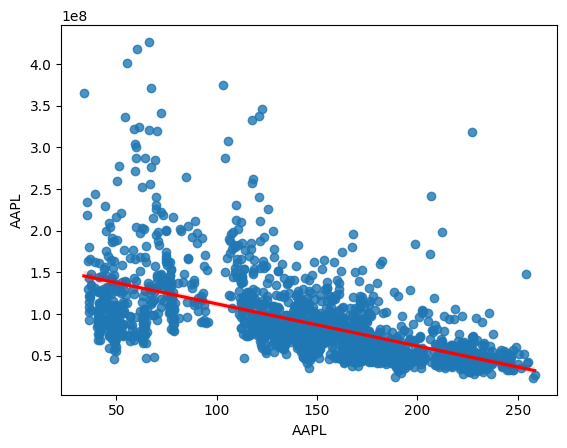

In [ ]:
df=sns.regplot(x="Close",y="Volume",data=AAPL,line_kws={"color":"red"})

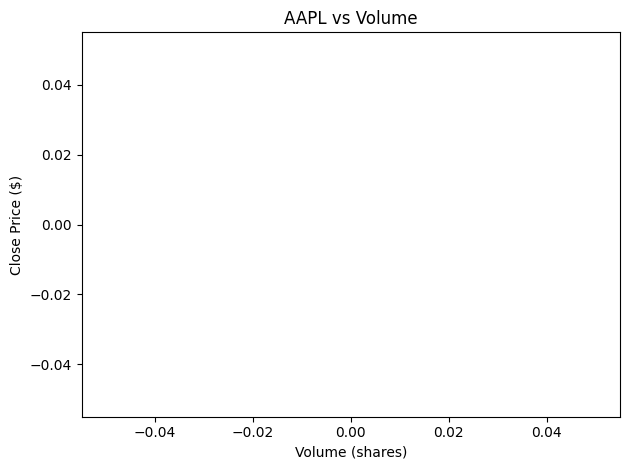

In [ ]:
df = sns.regplot(x="Close_corr",
                 y="Volume_corr",
                 data=AAPL,
                 line_kws={"color": "red"})
# Set title and labels in a single call
df.set(title='AAPL vs Volume',
       ylabel='Close Price ($)',
       xlabel='Volume (shares)')
# Show the plot
plt.tight_layout()  # Optional: Adjust layout to prevent clipping
plt.show()